In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\Nishant\\Machine Learning\\Datasets\\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Manipulation

In [6]:
df = df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
numeric_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[np.isnan(df['TotalCharges'])] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
df = df.dropna(subset=['TotalCharges'])

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No',1:'Yes'}) 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visualisation

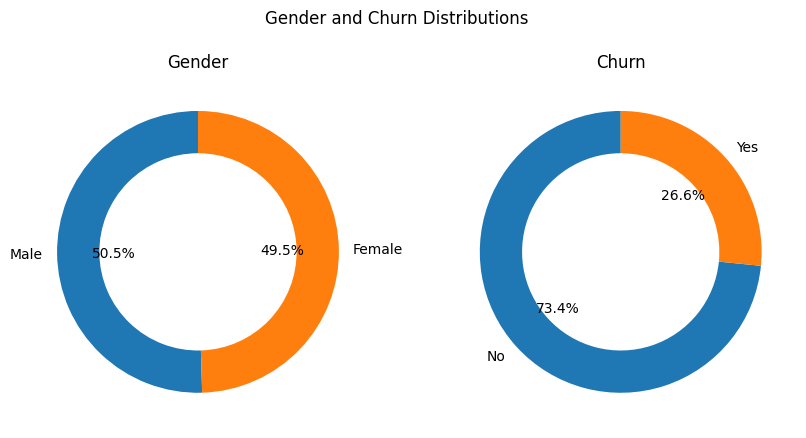

In [13]:
# Calculate counts directly from DataFrame
gender_counts = df["gender"].value_counts()
churn_counts = df["Churn"].value_counts()

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gender Donut Pie
axes[0].pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)
axes[0].set_title("Gender")

# Churn Donut Pie
axes[1].pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)
axes[1].set_title("Churn")

# Overall title
plt.suptitle("Gender and Churn Distributions")
plt.show()


In [14]:
churn_counts = df["Churn"].value_counts()
churn_counts

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [15]:
df['Churn'][df['Churn']=='No'].groupby(by=df['gender']).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [16]:
df['Churn'][df['Churn']=='Yes'].groupby(by=df['gender']).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

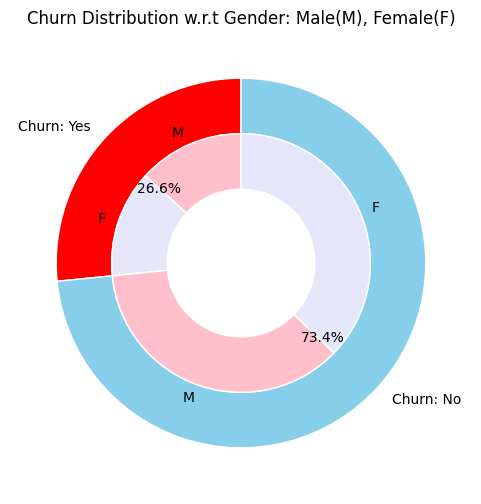

In [17]:
# Example counts (replace with your df.groupby results)
# Outer ring = churn (Yes/No)
churn_counts = [1869, 5163]  # Yes, No
churn_labels = ['Churn: Yes', 'Churn: No']
churn_colors = ['red', 'skyblue']

# Inner ring = gender split inside churn
# (Flattened list: first Yes->M/F, then No->M/F)
gender_churn_counts = [930, 939, 2544, 2619]  
gender_labels = ['M', 'F', 'M', 'F']
gender_colors = ['pink', 'lavender', 'pink', 'lavender']

fig, ax = plt.subplots(figsize=(6, 6))

# Outer ring (Churn)
wedges1, texts1, autotexts1 = ax.pie(
    churn_counts,
    labels=churn_labels,
    autopct='%1.1f%%',
    startangle=90,
    radius=1,
    colors=churn_colors,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# Inner ring (Gender inside churn)
wedges2, texts2 = ax.pie(
    gender_churn_counts,
    labels=gender_labels,
    radius=0.7,
    colors=gender_colors,
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# Title
ax.set(aspect="equal", title="Churn Distribution w.r.t Gender: Male(M), Female(F)")

plt.show()


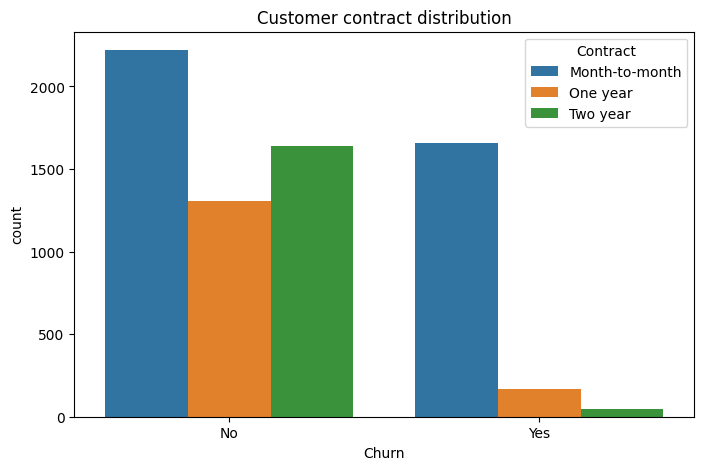

In [18]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x="Churn", hue="Contract")

plt.title("Customer contract distribution")
plt.ylabel("count")
plt.xlabel("Churn")
plt.legend(title="Contract")
plt.show()


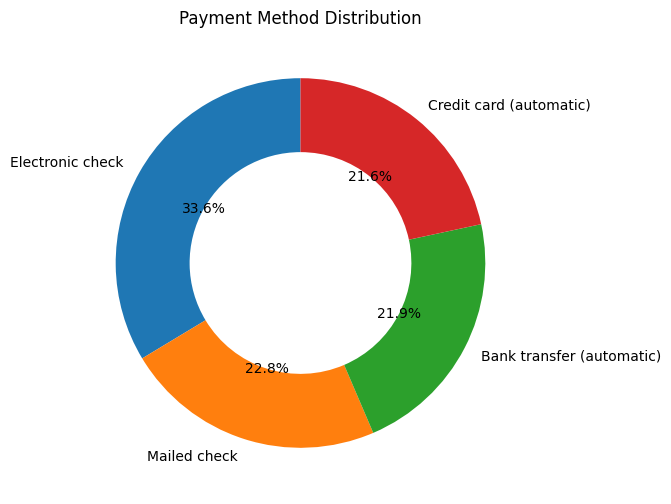

In [19]:
# Count payment method frequencies
payment_counts = df["PaymentMethod"].value_counts()

# Plot donut pie
fig, ax = plt.subplots(figsize=(7,6))
wedges, texts, autotexts = ax.pie(
    payment_counts.values,
    labels=payment_counts.index,   # method names
    autopct='%1.1f%%',             # percentage
    startangle=90,
    wedgeprops=dict(width=0.4),    # makes it a donut
)

# Equal aspect ratio ensures pie is a circle
ax.set(aspect="equal", title="Payment Method Distribution")

plt.show()


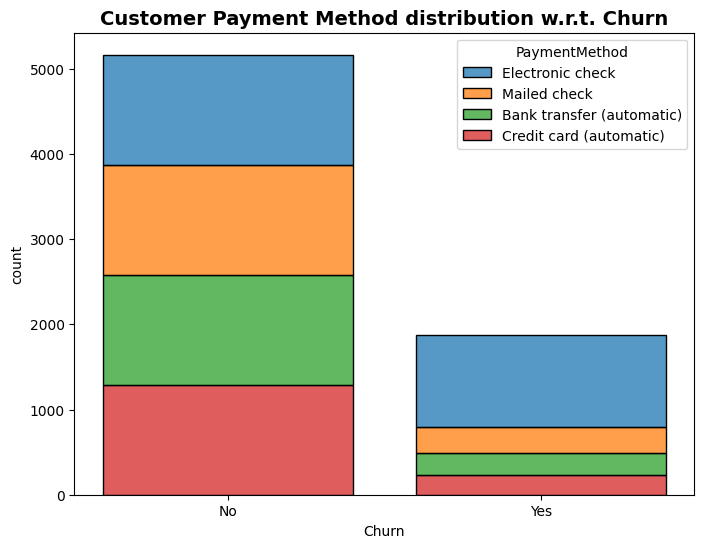

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x="Churn",
    hue="PaymentMethod",
    multiple="stack",   # stacked bars
    shrink=0.8          # bar width
)

plt.title("Customer Payment Method distribution w.r.t. Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("count")
plt.show()


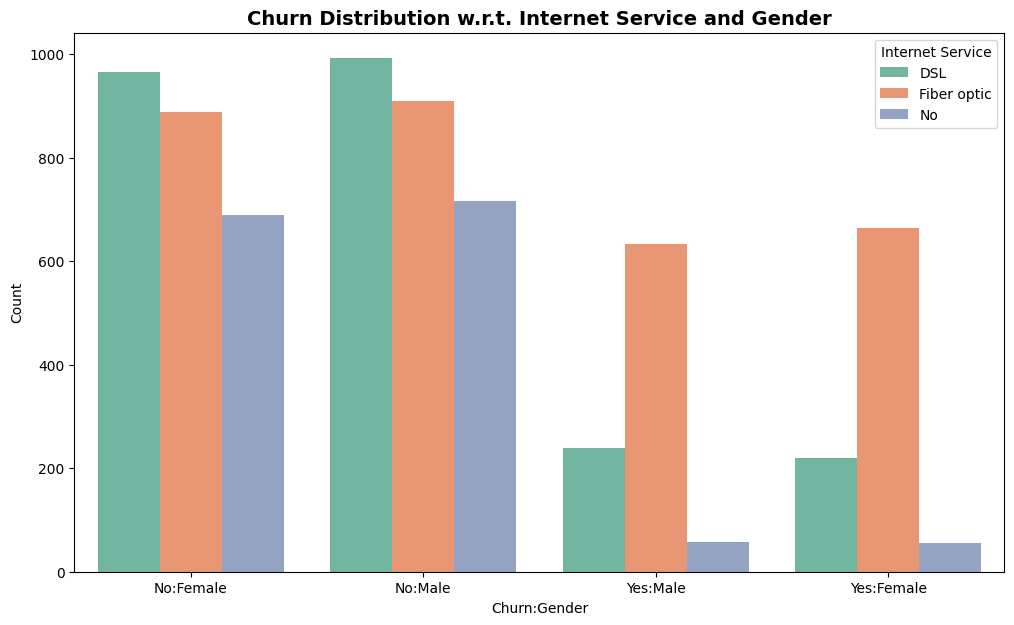

In [22]:
# Create a combined column for Churn and Gender
df["Churn_Gender"] = df["Churn"] + ":" + df["gender"]

plt.figure(figsize=(12,7))
sns.countplot(
    data=df,
    x="Churn_Gender",
    hue="InternetService",
    palette="Set2"
)

plt.title("Churn Distribution w.r.t. Internet Service and Gender", fontsize=14, weight="bold")
plt.xlabel("Churn:Gender")
plt.ylabel("Count")
plt.legend(title="Internet Service")
plt.show()



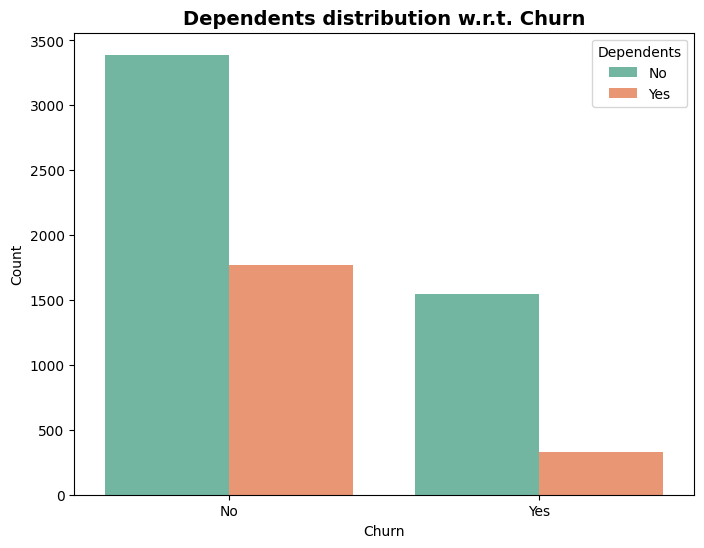

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Churn",
    hue="Dependents",
    dodge=True,          # <-- side-by-side bars
    palette="Set2"
)

plt.title("Dependents distribution w.r.t. Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="Dependents")
plt.show()


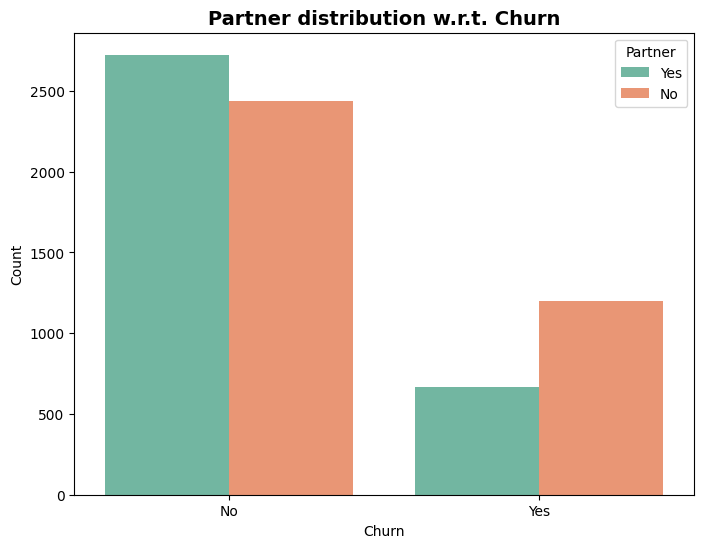

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Churn",
    hue="Partner",
    dodge=True,          # <-- side-by-side bars
    palette="Set2"
)

plt.title("Partner distribution w.r.t. Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="Partner")
plt.show()


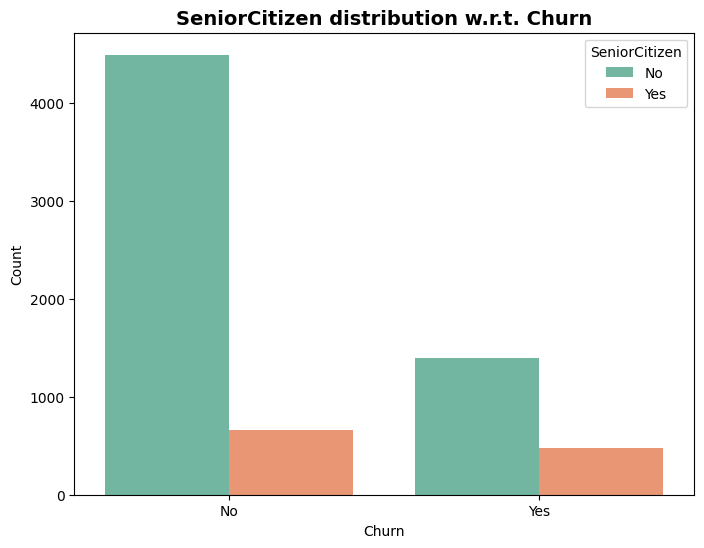

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Churn",
    hue="SeniorCitizen",
    dodge=True,          # <-- side-by-side bars
    palette="Set2"
)

plt.title("SeniorCitizen distribution w.r.t. Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="SeniorCitizen")
plt.show()

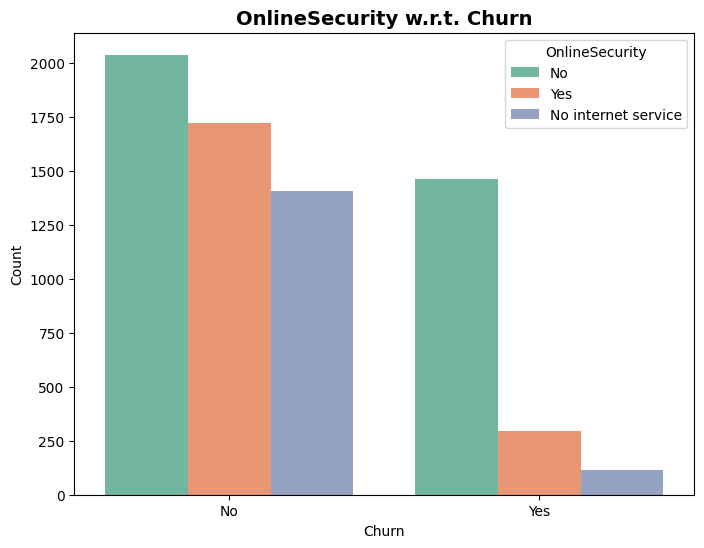

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Churn",
    hue="OnlineSecurity",
    dodge=True,          # <-- side-by-side bars
    palette="Set2"
)

plt.title("OnlineSecurity w.r.t. Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="OnlineSecurity")
plt.show()

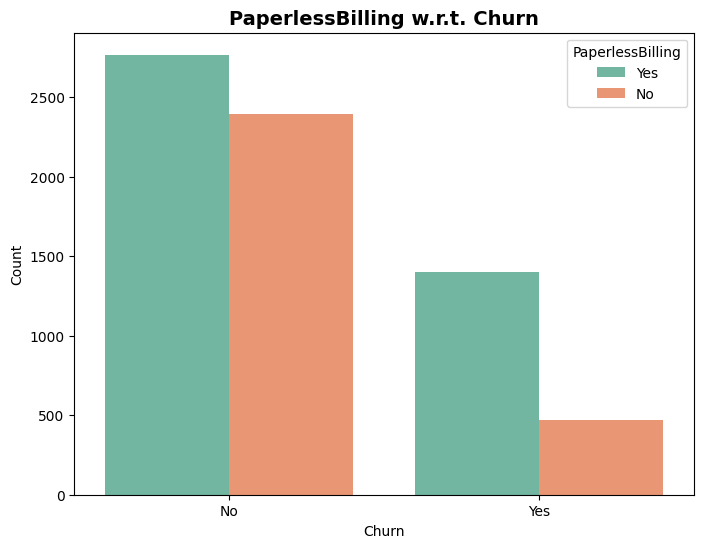

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Churn",
    hue="PaperlessBilling",
    dodge=True,          # <-- side-by-side bars
    palette="Set2"
)

plt.title("PaperlessBilling w.r.t. Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="PaperlessBilling")
plt.show()

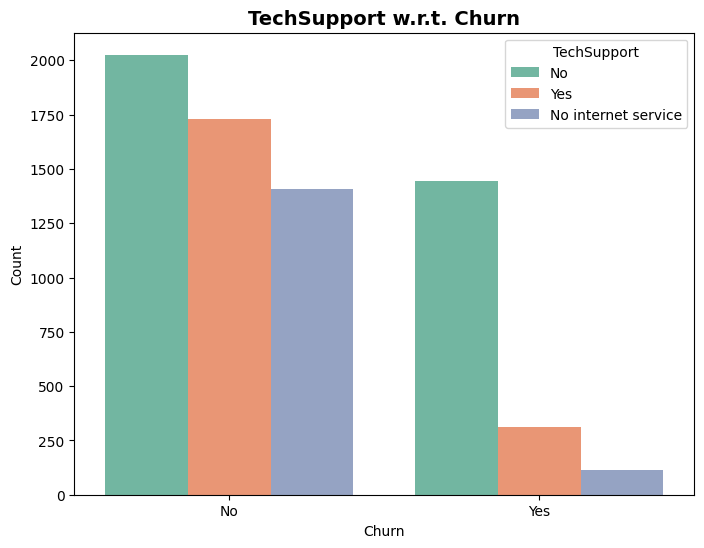

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Churn",
    hue="TechSupport",
    dodge=True,          # <-- side-by-side bars
    palette="Set2"
)

plt.title("TechSupport w.r.t. Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="TechSupport")
plt.show()

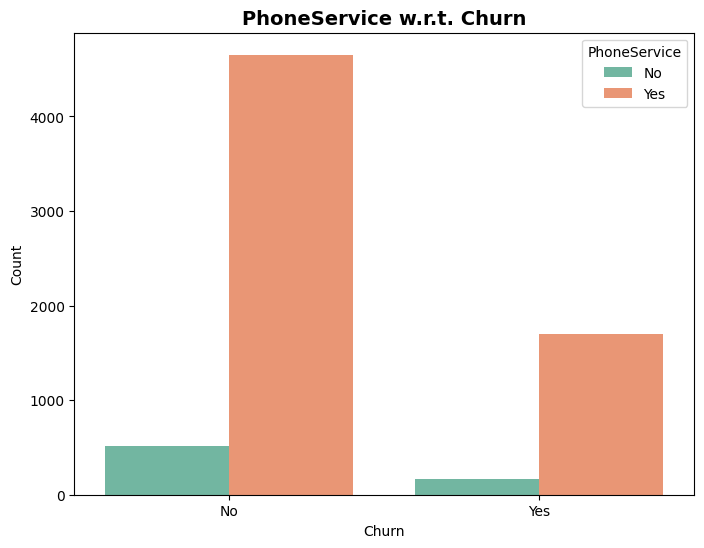

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Churn",
    hue="PhoneService",
    dodge=True,          # <-- side-by-side bars
    palette="Set2"
)

plt.title("PhoneService w.r.t. Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="PhoneService")
plt.show()

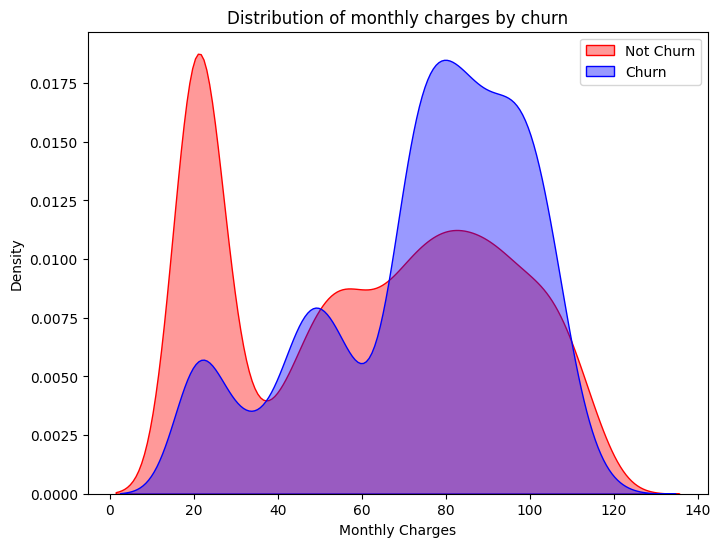

In [33]:
plt.figure(figsize=(8,6))

# KDE plot for customers who did not churn
sns.kdeplot(
    data=df[df["Churn"]=="No"], 
    x="MonthlyCharges", 
    fill=True, 
    color="red", 
    label="Not Churn", 
    alpha=0.4
)

# KDE plot for customers who churned
sns.kdeplot(
    data=df[df["Churn"]=="Yes"], 
    x="MonthlyCharges", 
    fill=True, 
    color="blue", 
    label="Churn", 
    alpha=0.4
)

plt.title("Distribution of monthly charges by churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()
plt.show()


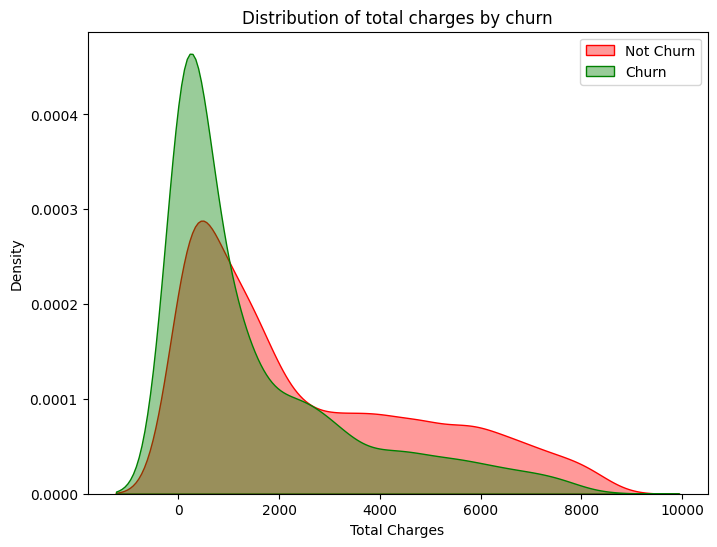

In [35]:
plt.figure(figsize=(8,6))

# KDE plot for customers who did not churn
sns.kdeplot(
    data=df[df["Churn"]=="No"], 
    x="TotalCharges", 
    fill=True, 
    color="red", 
    label="Not Churn", 
    alpha=0.4
)

# KDE plot for customers who churned
sns.kdeplot(
    data=df[df["Churn"]=="Yes"], 
    x="TotalCharges", 
    fill=True, 
    color="green", 
    label="Churn", 
    alpha=0.4
)

plt.title("Distribution of total charges by churn")
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.legend()
plt.show()


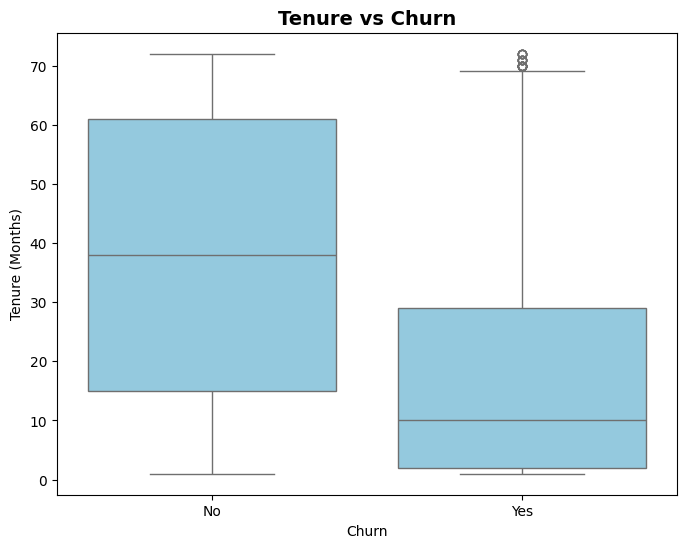

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Churn",
    y="tenure",
    color="skyblue",  
    showfliers=True
)

plt.title("Tenure vs Churn", fontsize=14, weight="bold")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


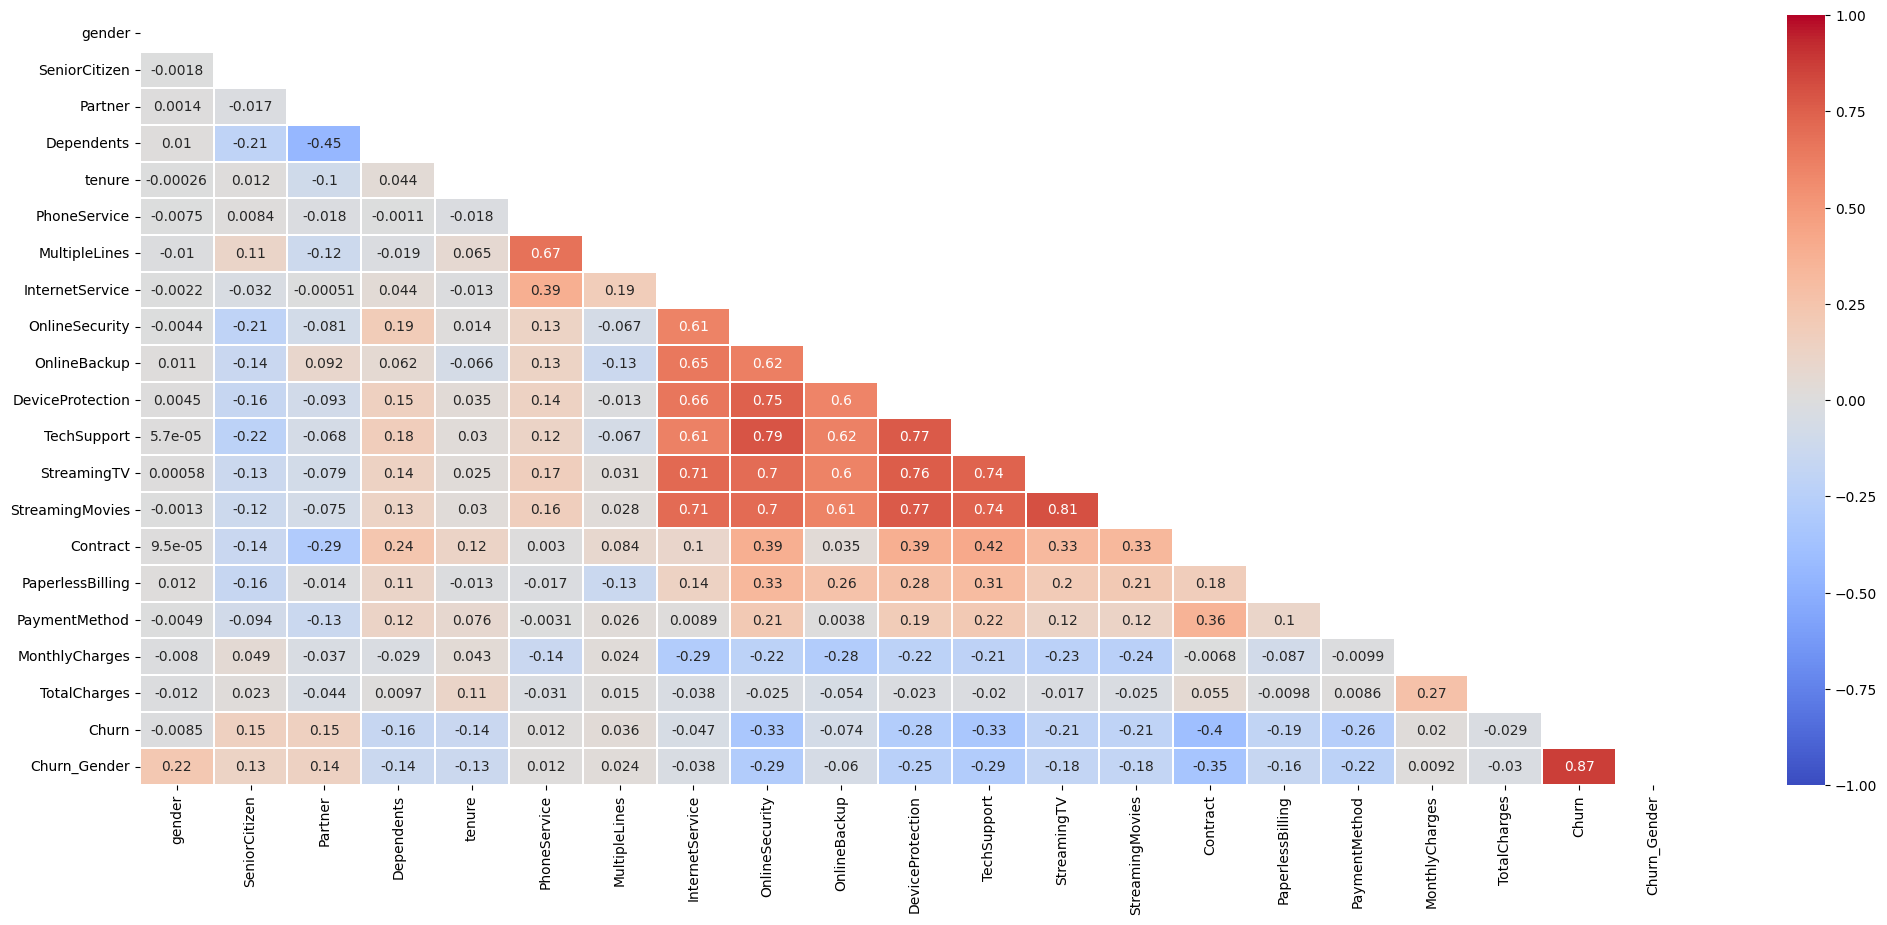

In [42]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)